**Plan**

**1. Introduction to Representation Learning**<br>
**2. Classic Method**<br>
**3. Static Method**<br>
**4. Dynamic Method**

# **Introduction to Representation Leearning**

Representation learning plays a crucial role in how NLP models understand and process language, enabling tasks such as sentiment analysis, machine translation, and question answering. This chapter explores various methods categorized into classic, static, and dynamic approaches.

# **Classic Method**

**<h2>Bag-of-Words (BOW)</h2>**

**Definition:** The Bag-of-Words (BOW) model is a simple and basic method for representing text in Natural Language Processing (NLP). It disregards grammar, word order, and context, focusing solely on the presence and frequency of words.

**Process:**
  * **Tokenization:** Split the text into individual words or tokens.
  * **Counting:** Count the occurrences of each word in the text.
  * **Vectorization:** Represent the text as a vector where each element corresponds to the count of a word in a predefined vocabulary.

**Example:**<br>
Consider the following two sentences:<br>
**Sentence 1: "The cat sat on the mat."**<br>
**Sentence 2: "The dog played in the park."**<br><br>

**BOW Representation:**<br>
Define a vocabulary based on unique words across both sentences: <br>
{"the", "cat", "sat", "on", "mat", "dog", "played", "in", "park"}.<br>

Vectorize each sentence:<br>
        Sentence 1: [1, 1, 1, 1, 1, 0, 0, 0, 0]<br>
        Sentence 2: [1, 0, 0, 0, 0, 1, 1, 1, 1]

Here, each vector represents the occurrence count of each word in the respective sentence.

---



**<h2>TF-IDF (Term Frequency-Inverse Document Frequency)</h2>**

**Definition:** TF-IDF is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. It increases with the number of times a word appears in the document (Term Frequency) and is offset by the frequency of the word in the corpus (Inverse Document Frequency).

Formula:
$$TF-IDF(t,d)=TF(t,d)×IDF(t)$$

Where:

$TF(t,d) =$ Term Frequency of term $t$ in document $d$<br>
$IDF(t) =$ Inverse Document Frequency of term $t$ across the corpus<br><br>

Example:<br>
Consider a corpus with two documents:

Document 1: "The cat sat on the mat."<br>
Document 2: "The dog played in the park."<br><br>

TF-IDF Calculation:

* Compute TF for each term in each document (count of term occurrences in the document divided by total terms in the document).
* Compute IDF for each term (logarithm of total number of documents divided by the number of documents containing the term).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Example documents
corpus = [
    "The cat sat on the mat.",
    "The dog played in the park."
]

In [ ]:
# Create BOW vectors
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(corpus)
print("BOW Vocabulary:")
print(vectorizer.get_feature_names_out())
print("BOW Representation:")
print(X_bow.toarray())

In [ ]:
# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
print("\nTF-IDF Vocabulary:")
print(tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Representation:")
print(X_tfidf.toarray())

# **Static Method**

Static methods in Natural Language Processing (NLP) focus on generating distributed representations of words, capturing semantic similarities and relationships. These methods enable models to understand the meaning of words based on their context within a corpus. Key static methods include Word2Vec, GloVe (Global Vectors for Word Representation), and FastText.

**<h2>Word2Vec</h2>**

Word2Vec is a technique for learning word embeddings developed by Google. It maps words to dense vector representations in a continuous vector space based on the context in which they appear.

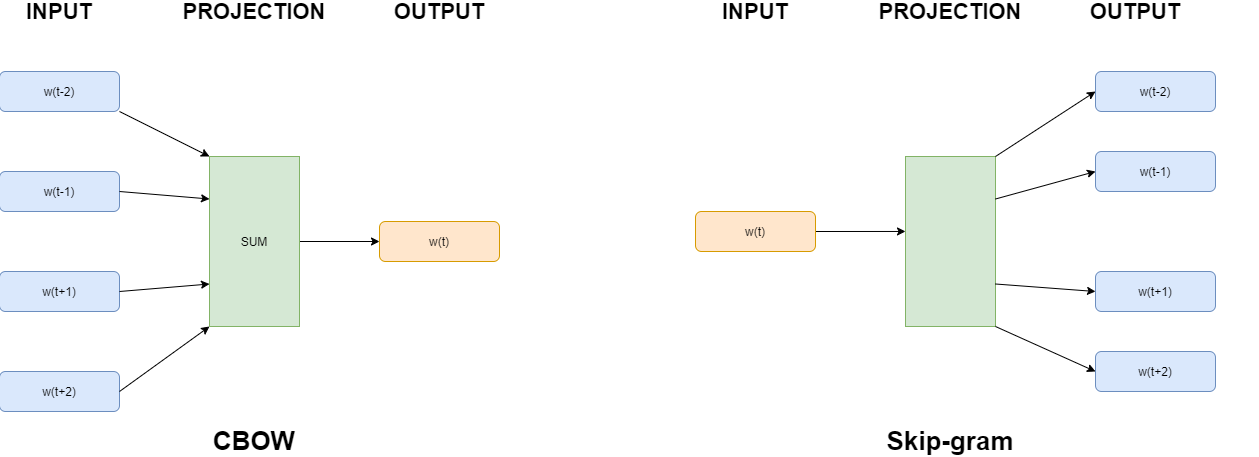

**Definition**: Word2Vec is a technique for learning word embeddings developed by Google. It maps words to dense vector representations in a continuous vector space based on the context in which they appear.

**Algorithms**:
- **Continuous Bag-of-Words (CBOW)**: Predicts the current word based on its context (surrounding words).
- **Skip-gram**: Predicts surrounding words given the current word.

**Mathematics**:
- **CBOW**: Given a sequence of words $ w_1, w_2, ..., w_T $, CBOW maximizes the average log probability:
  $$ \frac{1}{T} \sum_{t=1}^{T} \log p(w_t | w_{t-c}, ..., w_{t-1}, w_{t+1}, ..., w_{t+c}) $$
  where \( c \) is the context window size.

- **Skip-gram**: Maximizes the log probability of predicting context words $ w_{t+j} $ given the current word $ w_t $:
  $$ \sum_{t=1}^{T} \sum_{-c \leq j \leq c, j \neq 0} \log p(w_{t+j} | w_t) $$


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Example corpus
corpus = [
    "The cat sat on the mat.",
    "The dog played in the park."
]

# Tokenize sentences into words
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=1)  # sg=1 for Skip-gram

# Get vector representation of a word
print("Vector representation of 'cat':")
print(model.wv['cat'])

# Find similar words
print("\nSimilar words to 'cat':")
print(model.wv.most_similar('cat'))

**<h2>GloVe (Global Vectors for Word Representation)</h2>**

**Definition**: GloVe is a model for obtaining word embeddings by training on global word-word co-occurrence statistics from a corpus.

**Mathematics**:
- GloVe constructs a co-occurrence matrix $ X $ where $ X_{ij} $ represents how often word $ j $ appears in the context of word $ i $.

- The objective is to learn word embeddings $ w_i $ and $ w_j $ such that:
  $$ w_i^T \tilde{w}_j = \log(X_{ij}) $$

In [ ]:
from glove import Corpus, Glove
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Example corpus
corpus = [
    "The cat sat on the mat.",
    "The dog played in the park."
]

# Tokenize sentences into words
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Create a Corpus object
corpus_model = Corpus()
corpus_model.fit(tokenized_corpus, window=10)

# Train the GloVe model
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus_model.matrix, epochs=100, no_threads=4, verbose=True)

# Get vector representation of a word
print("Vector representation of 'cat':")
print(glove.word_vectors[glove.dictionary['cat']])

# Find similar words
print("\nSimilar words to 'cat':")
print(glove.most_similar('cat', number=5))


**<h2>FastText</h2>**

**Definition**: FastText is an extension to Word2Vec that takes into account subword information. It represents each word as a bag of character n-grams, enabling it to handle out-of-vocabulary words.

**Algorithms**:
- Extends Skip-gram to handle subword information using character n-grams.

In [ ]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Example corpus
corpus = [
    "The cat sat on the mat.",
    "The dog played in the park."
]

# Tokenize sentences into words
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Train FastText model
model = FastText(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=1)

# Get vector representation of a word
print("Vector representation of 'cat':")
print(model.wv['cat'])

# Find similar words
print("\nSimilar words to 'cat':")
print(model.wv.most_similar('cat'))

# **Dynamic Method**

Dynamic methods in Natural Language Processing (NLP) focus on leveraging deep learning architectures, particularly Transformers, which excel at capturing complex relationships and dependencies in text data. These methods have revolutionized NLP tasks by allowing models to learn contextualized representations of words and sentences.

* **Transformers with Attention Mechanism**

**Definition**: Transformers are deep learning models introduced in the paper "Attention is All You Need" by Vaswani et al. They are based on self-attention mechanisms that enable models to weigh the significance of each word in the context of the entire input sequence.

**Components**:
- **Self-Attention**: Computes attention scores between all pairs of words in a sequence, allowing the model to weigh the importance of each word based on the context.
- **Multi-head Attention**: Utilizes multiple attention heads to capture different aspects of relationships between words.
- **Positional Encoding**: Adds positional information to the input embeddings, enabling the model to understand the order of words.

**Mathematics**:
- **Self-Attention**: Given input sequences $ X $, compute attention scores $ A $ using queries $ Q $, keys $ K $, and values $ V $:
  $$ A = \text{softmax} \left( \frac{QK^T}{\sqrt{d_k}} \right) V $$
  where $ d_k $ is the dimensionality of $ K $ and $ Q $.

- **Transformer Architecture**: Consists of encoder and decoder layers using self-attention and feed-forward neural networks.



Dynamic methods like Transformers with attention mechanism have significantly advanced NLP by allowing models to capture intricate relationships and dependencies in text data. These methods, exemplified by architectures like BERT and GPT, learn contextualized representations of words and sentences, enabling superior performance in various NLP tasks such as text classification, named entity recognition, and language translation.

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertModel

# Example input text
text = "The cat sat on the mat."

# Tokenize input text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer(text, return_tensors='pt')

# Load pre-trained BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Forward pass through BERT
outputs = model(**tokens)

# Get the last hidden states from BERT
last_hidden_states = outputs.last_hidden_state
pooler_output = outputs.pooler_output

# Print the output shape
print("Shape of last hidden state:", last_hidden_states.shape)

# Print the output shape
print("Shape of pooler output:", pooler_output



Dynamic methods like Transformers with attention mechanism have significantly advanced NLP by allowing models to capture intricate relationships and dependencies in text data. These methods, exemplified by architectures like BERT and GPT, learn contextualized representations of words and sentences, enabling superior performance in various NLP tasks such as text classification, named entity recognition, and language translation.